# Loading Images For Exploring / Training

## Import Libs

*NOTE*: must have lib _pillow_ installed (pip3 install pillow)

In [85]:
import numpy as np
import boto3
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import io

## Create S3 Handle

In [52]:
s3 = boto3.resource('s3')

## Create Bucket Handle

In [53]:
bucket = s3.Bucket('a.i.dermatologist')

## Download example object to explore

In [102]:
test_obj = None
# filter to the exact obj we want
for obj in bucket.objects.filter(Prefix='unmodifiedData/ISIC_0000001.jpg'):
    test_obj = obj

### Explore metadata

*NOTE*: Not all objects are guaranteed to have every key shown below. 

In [110]:
test_obj.Object().metadata

{'anatom_site_general': 'anterior torso',
 'sex': 'female',
 'benign_malignant': 'benign',
 'diagnosis': 'nevus',
 'diagnosis_confirm_type': 'None',
 'melanocytic': 'True',
 'age_approx': '30'}

### Get and view actual image

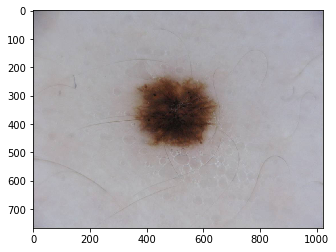

In [107]:
img = mpimg.imread(io.BytesIO(test_obj.Object().get()['Body'].read()), 'jpg')
plt.imshow(img)
plt.show()

## Download the images and properly format

In [111]:
limit = 20
X_all = []
y_all = []
for obj in bucket.objects.filter(Prefix='unmodifiedData').limit(limit):
    if 'benign_malignant' in obj.Object().metadata:
        X_all.append(mpimg.imread(io.BytesIO(obj.Object().get()['Body'].read()), 'jpg'))
        if obj.Object().metadata['benign_malignant'] == 'benign':
            y_all.append(0)
        elif obj.Object().metadata['benign_malignant'] == 'malignant':
            y_all.append(1)


### View y_all 

In [131]:
# first n labels
n_labels = 5
print('first {} y labels\n'.format(n_labels), y_all[:n_labels])

classes, counts = np.unique(y_all, return_counts=True)
print('\nclass: count\n{: ^5}: {: ^5}\n{: ^5}: {: ^5}'.format(classes[0], counts[0], classes[1], counts[1]))

first 5 y labels
 [0, 1, 0, 1, 0]

class: count
  0  :  16  
  1  :   3  


## View an image from the positive class (i.e., malignant)

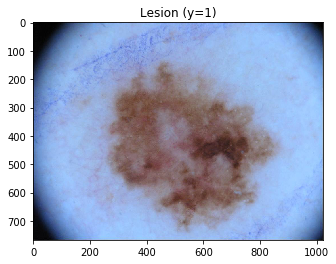

In [140]:
ith_im = 1
plt.imshow(X_all[ith_im])
plt.title('Lesion (y={})'.format(y_all[ith_im]))
plt.show()

## View an image from the positive class (i.e., benign)

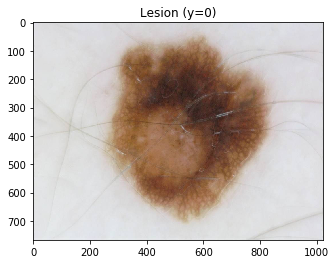

In [139]:
ith_im = 2
plt.imshow(X_all[ith_im])
plt.title('Lesion (y={})'.format(y_all[ith_im]))
plt.show()